# COVID-19 Outcome Prediction
The data used in this project will help to identify whether a person is going to recover from 
coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are 
based on guidelines given by the World Health Organization (WHO).\

It is required to design different classifiers to the predict the outcome (death/recovered) when a new 
person is admitted to the hospital. The data is already cleaned and preprocessed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('data.csv', index_col=0)
print(df.shape)
df.head(2)

(863, 14)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0


1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female 
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear: 
14. Result: death (1) or recovered (0)


In [3]:
df.isnull().sum()

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

In [4]:
df.dtypes

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object

In [5]:
df.shape

(863, 14)

In [6]:
df['gender'].value_counts()

1    389
0    302
2    172
Name: gender, dtype: int64

In [7]:
df['country'].value_counts()

18    172
8     155
13     90
24     86
12     54
29     37
11     35
28     33
25     32
23     31
30     17
4      17
32     15
15     14
31     14
2      11
7      10
19      9
33      8
21      4
14      3
17      3
3       2
9       1
1       1
0       1
6       1
20      1
16      1
5       1
26      1
10      1
22      1
27      1
Name: country, dtype: int64

In [8]:
df['symptom1'].value_counts()

14    644
6     143
2      37
4       7
20      7
21      3
18      2
22      2
24      2
15      1
0       1
5       1
23      1
16      1
17      1
7       1
9       1
19      1
13      1
11      1
8       1
12      1
1       1
10      1
3       1
Name: symptom1, dtype: int64

In [9]:
df['symptom2'].value_counts()

31    724
7      54
12     15
17     14
5       8
27      8
13      4
28      4
24      4
10      2
15      2
25      2
19      2
9       2
16      1
29      1
8       1
14      1
3       1
18      1
4       1
1       1
21      1
26      1
23      1
11      1
6       1
22      1
2       1
0       1
30      1
20      1
Name: symptom2, dtype: int64

In [10]:
df['from_wuhan'].value_counts()

0    770
1     93
Name: from_wuhan, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe.

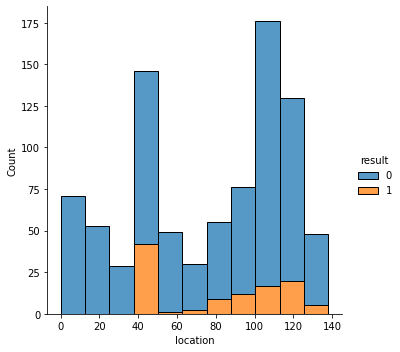

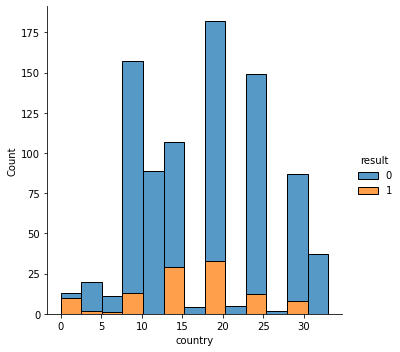

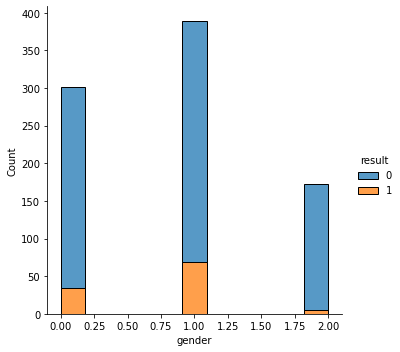

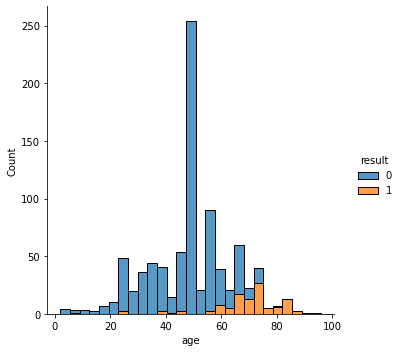

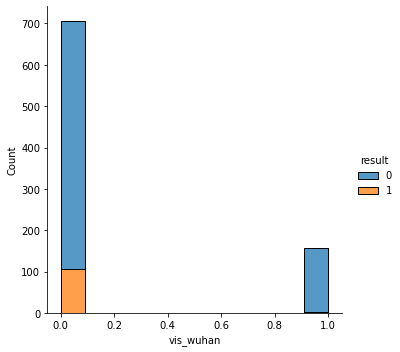

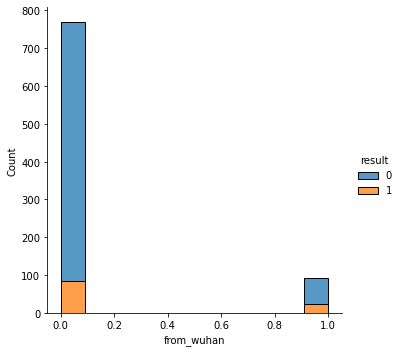

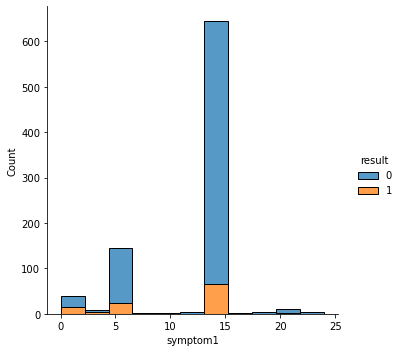

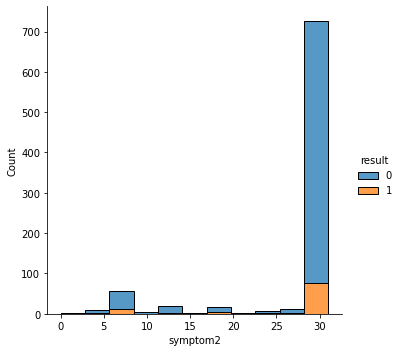

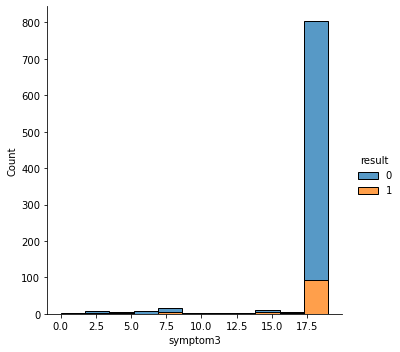

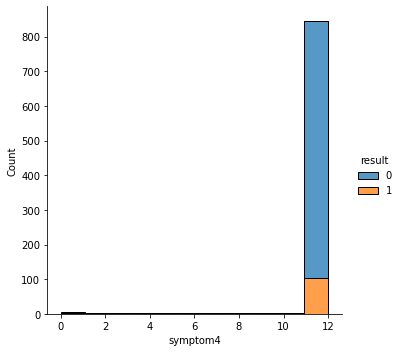

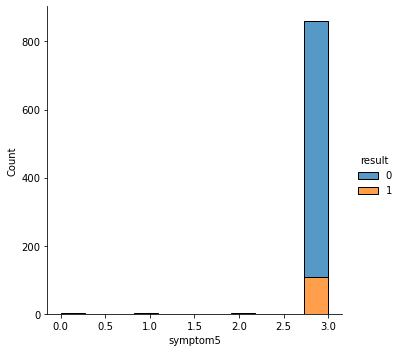

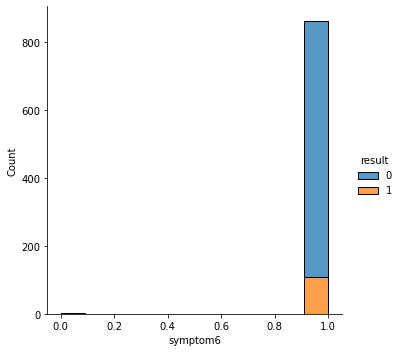

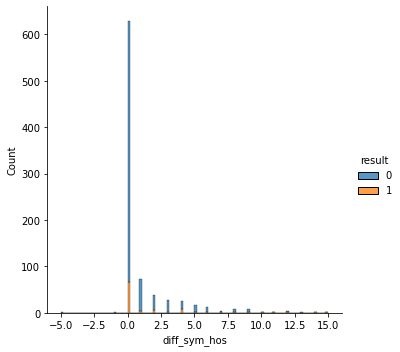

In [11]:
for i in range(len(df.columns)-1):
   sns.displot(df, x=df.columns[i],hue='result',multiple="stack")

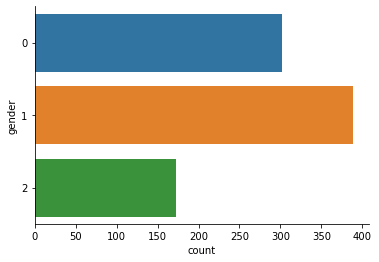

In [12]:
sns.countplot(y="gender", data=df)
sns.despine()

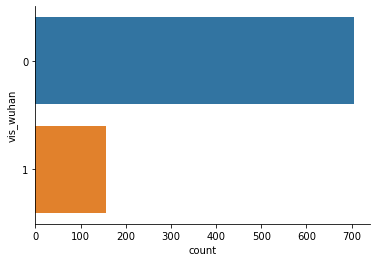

In [13]:
sns.countplot(y="vis_wuhan", data=df)
sns.despine()

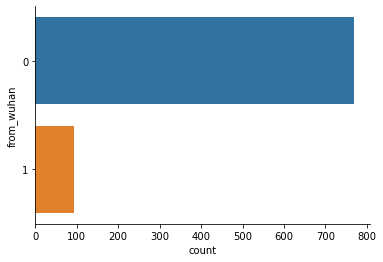

In [14]:
sns.countplot(y="from_wuhan", data=df)
sns.despine()

We can see that most of them didnt visit or come from wuhan

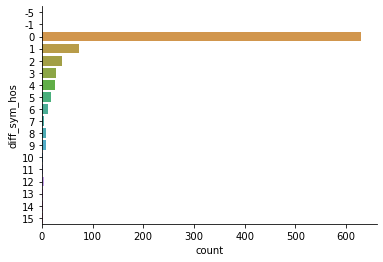

In [15]:
sns.countplot(y="diff_sym_hos", data=df)
sns.despine()

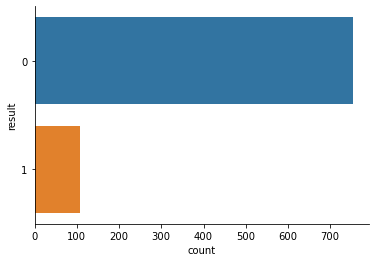

In [16]:
sns.countplot(y="result", data=df)
sns.despine()

We can see clearly that pur data is impalanced

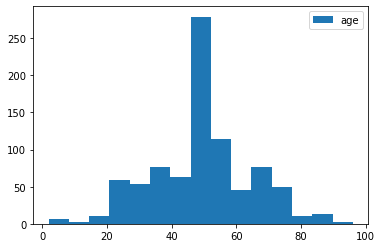

In [17]:
plt.hist(x = 'age',data = df,bins = 15 , label='age')
plt.rc("axes.spines", top=False, right=False)
plt.legend()

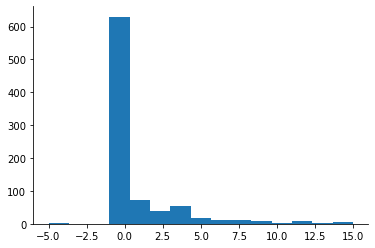

In [18]:
plt.hist(x = 'diff_sym_hos',data = df,bins = 15)
plt.rc("axes.spines", top=False, right=False)


### Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

In [19]:
#co-relation
df.corr()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
location,1.000000,0.309347,0.030077,-0.027330,0.022821,0.080120,0.033078,0.017961,0.010472,-0.026823,0.033692,0.015341,-0.119397,0.046240
country,0.309347,1.000000,0.193208,0.072339,-0.149798,-0.194170,-0.078971,-0.085210,-0.042933,-0.018526,-0.009371,-0.004384,-0.146037,-0.094443
gender,0.030077,0.193208,1.000000,-0.020662,-0.005588,-0.138997,0.146706,0.116159,0.090858,0.021882,0.026320,0.039867,-0.176528,-0.061441
age,-0.027330,0.072339,-0.020662,1.000000,-0.157173,-0.051229,-0.209028,-0.127251,-0.074863,-0.069396,0.049817,0.055145,0.074573,0.515127
vis_wuhan,0.022821,-0.149798,-0.005588,-0.157173,1.000000,-0.154200,0.087330,0.094360,0.086113,0.063738,0.025780,0.016062,0.065908,-0.151122
from_wuhan,0.080120,-0.194170,-0.138997,-0.051229,-0.154200,1.000000,0.036539,0.046923,0.068144,0.021704,0.018999,0.011837,0.019706,0.128314
symptom1,0.033078,-0.078971,0.146706,-0.209028,0.087330,0.036539,1.000000,0.519404,0.260397,0.095402,-0.002658,0.086430,-0.141160,-0.163039
symptom2,0.017961,-0.085210,0.116159,-0.127251,0.094360,0.046923,0.519404,1.000000,0.530968,0.329583,0.159823,0.072975,-0.119052,-0.103270
symptom3,0.010472,-0.042933,0.090858,-0.074863,0.086113,0.068144,0.260397,0.530968,1.000000,0.429853,0.120301,0.146347,-0.124293,-0.074982
symptom4,-0.026823,-0.018526,0.021882,-0.069396,0.063738,0.021704,0.095402,0.329583,0.429853,1.000000,0.277558,0.110553,-0.089592,-0.108723


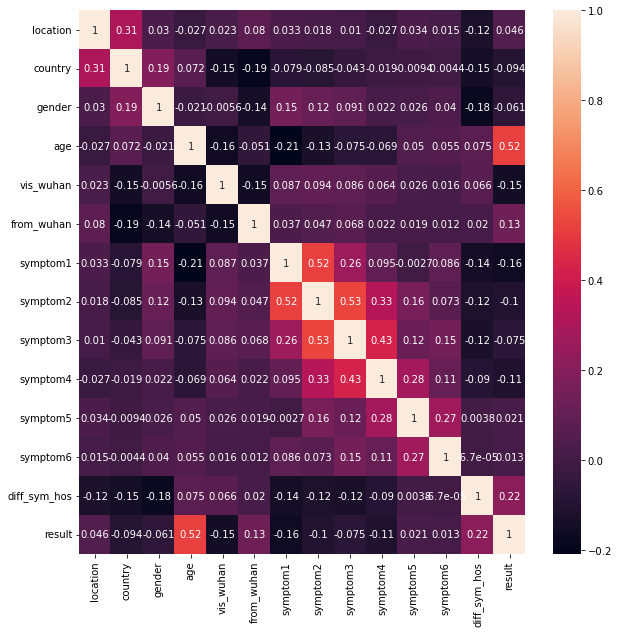

In [24]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

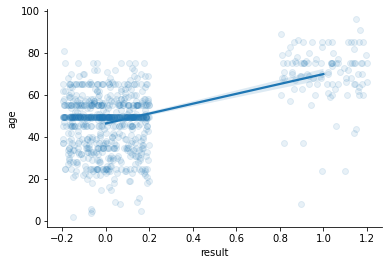

In [21]:
sns.regplot(x = 'result',y = 'age',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()
# As increasing in age ,, the result becomes 1

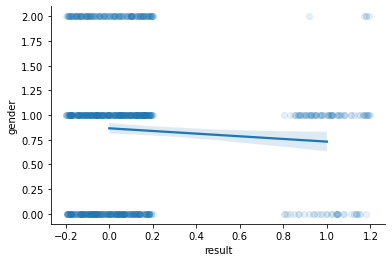

In [22]:
sns.regplot(x = 'result',y = 'gender',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()